# 1-CONVOLUTION 

Signal 1 : [1, 2, 3, 4, 5, 5, 6, 8]
Signal 2 : [-1, 0, 1, 2, 3, 3, 4, 6]
Résultat de la convolution : [-1. -2. -2.  0.  5. 14. 26. 42. 67. 84. 93. 92. 78. 68. 48.]


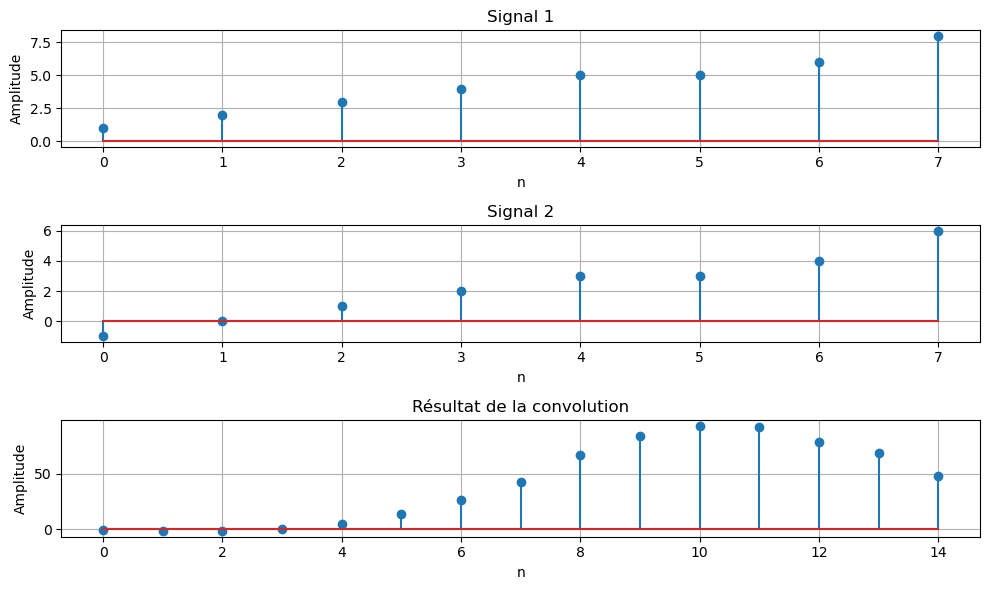

In [3]:
# Importation des bibliothèques nécessaires
import numpy as np  # Pour manipuler les tableaux de données numériques
import matplotlib.pyplot as plt  # Pour visualiser les signaux sous forme de graphiques

# Définition de la fonction de convolution discrète
def convolution(signal1, signal2):
    """
    Effectue la convolution discrète entre deux signaux numériques.

    Arguments :
    signal1 : Liste ou tableau représentant le premier signal.
    signal2 : Liste ou tableau représentant le second signal.

    Retourne :
    Un tableau contenant le résultat de la convolution.
    """
    if len(signal1) == 0 or len(signal2) == 0:
        raise ValueError("Les signaux ne peuvent pas être vides.")
    len1 = len(signal1)
    len2 = len(signal2)
    result_length = len1 + len2 - 1
    result = np.zeros(result_length)

    for i in range(result_length):
        for j in range(len2):
            if 0 <= i - j < len1:
                result[i] += signal1[i - j] * signal2[j]

    return result

# Définition des signaux d'entrée
signal1 = [1, 2, 3, 4, 5, 5, 6, 8]  # Exemple de premier signal
signal2 = [-1, 0, 1, 2, 3, 3, 4, 6]    # Exemple de second signal

# Calcul du résultat de la convolution
result = convolution(signal1, signal2)

# Affichage des résultats sous forme de texte
print("Signal 1 :", signal1)
print("Signal 2 :", signal2)
print("Résultat de la convolution :", result)

# Visualisation des signaux et du résultat
plt.figure(figsize=(10, 6))

# Tracé du premier signal
plt.subplot(3, 1, 1)  # Position du premier graphique
plt.stem(range(len(signal1)), signal1)  # Tracé des impulsions sans 'use_line_collection'
plt.title("Signal 1")  # Titre du graphique
plt.xlabel("n")  # Légende de l'axe des abscisses
plt.ylabel("Amplitude")  # Légende de l'axe des ordonnées
plt.grid()  # Activation de la grille pour une meilleure lisibilité

# Tracé du second signal
plt.subplot(3, 1, 2)  # Position du second graphique
plt.stem(range(len(signal2)), signal2)  # Tracé des impulsions sans 'use_line_collection'
plt.title("Signal 2")  # Titre du graphique
plt.xlabel("n")  # Légende de l'axe des abscisses
plt.ylabel("Amplitude")  # Légende de l'axe des ordonnées
plt.grid()  # Activation de la grille pour une meilleure lisibilité

# Tracé du résultat de la convolution
plt.subplot(3, 1, 3)  # Position du troisième graphique
plt.stem(range(len(result)), result)  # Tracé des impulsions sans 'use_line_collection'
plt.title("Résultat de la convolution")  # Titre du graphique
plt.xlabel("n")  # Légende de l'axe des abscisses
plt.ylabel("Amplitude")  # Légende de l'axe des ordonnées
plt.grid()  # Activation de la grille pour une meilleure lisibilité

# Ajustement de la disposition des graphiques
plt.tight_layout()  # Évite que les sous-graphiques se chevauchent

# Affichage de la figure contenant les graphiques
plt.show()


# 2-SPECTRE FFT D'UN SIGNAL NUMERIQUE 

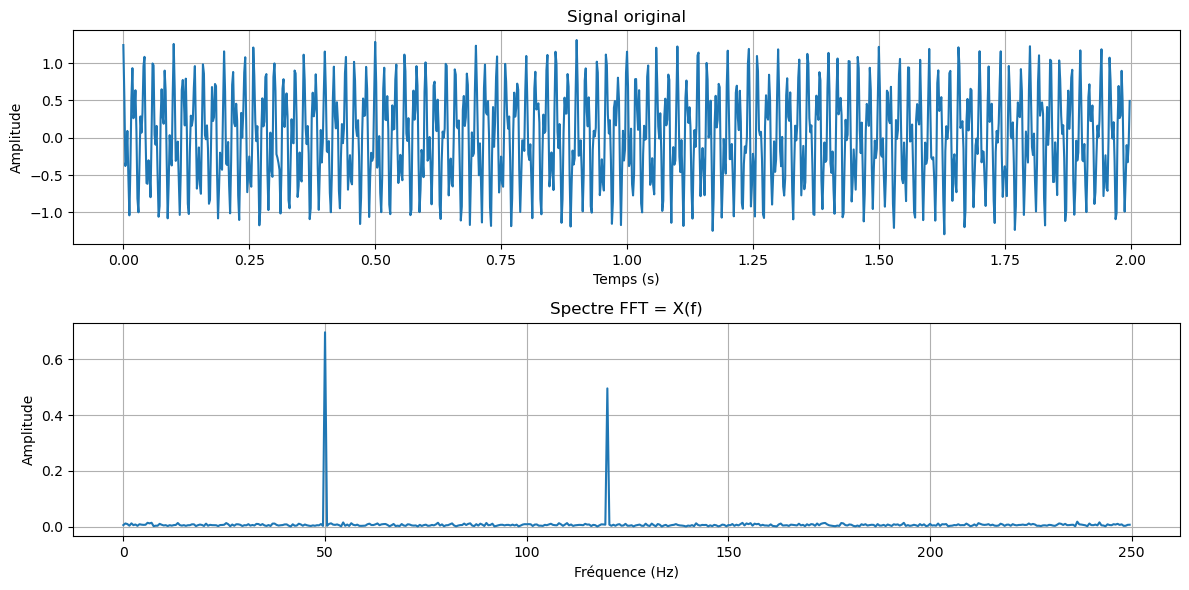

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Création d'un signal composite
Fs = 500  # Fréquence d'échantillonnage
T = 1.0 / Fs  # Période d'échantillonnage
L = 1000  # Longueur du signal
t = np.arange(0, L) * T  # Vecteur temps

# Signal contenant des composantes de différentes fréquences
signal = 0.7 * np.cos(2.0 * np.pi * 50.0 * t) + 0.5 * np.cos(2.0 * np.pi * 120.0 * t) 
signal += 0.1 * np.random.randn(L)  # Ajouter du bruit

# Calcul de la FFT
fft_values = np.fft.fft(signal)
fft_freqs = np.fft.fftfreq(L, T)

# Prendre la moitié positive de la FFT (symétrique)
half_L = L // 2
fft_values = 2.0 / L * np.abs(fft_values[:half_L])
fft_freqs = fft_freqs[:half_L]

# Affichage du signal original
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Signal original')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.grid()

# Affichage du spectre de fréquences
plt.subplot(2, 1, 2)
plt.plot(fft_freqs, fft_values)
plt.title('Spectre FFT = X(f)')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()

# 3-filtre numerique ideal et reel d'un signal numerique 

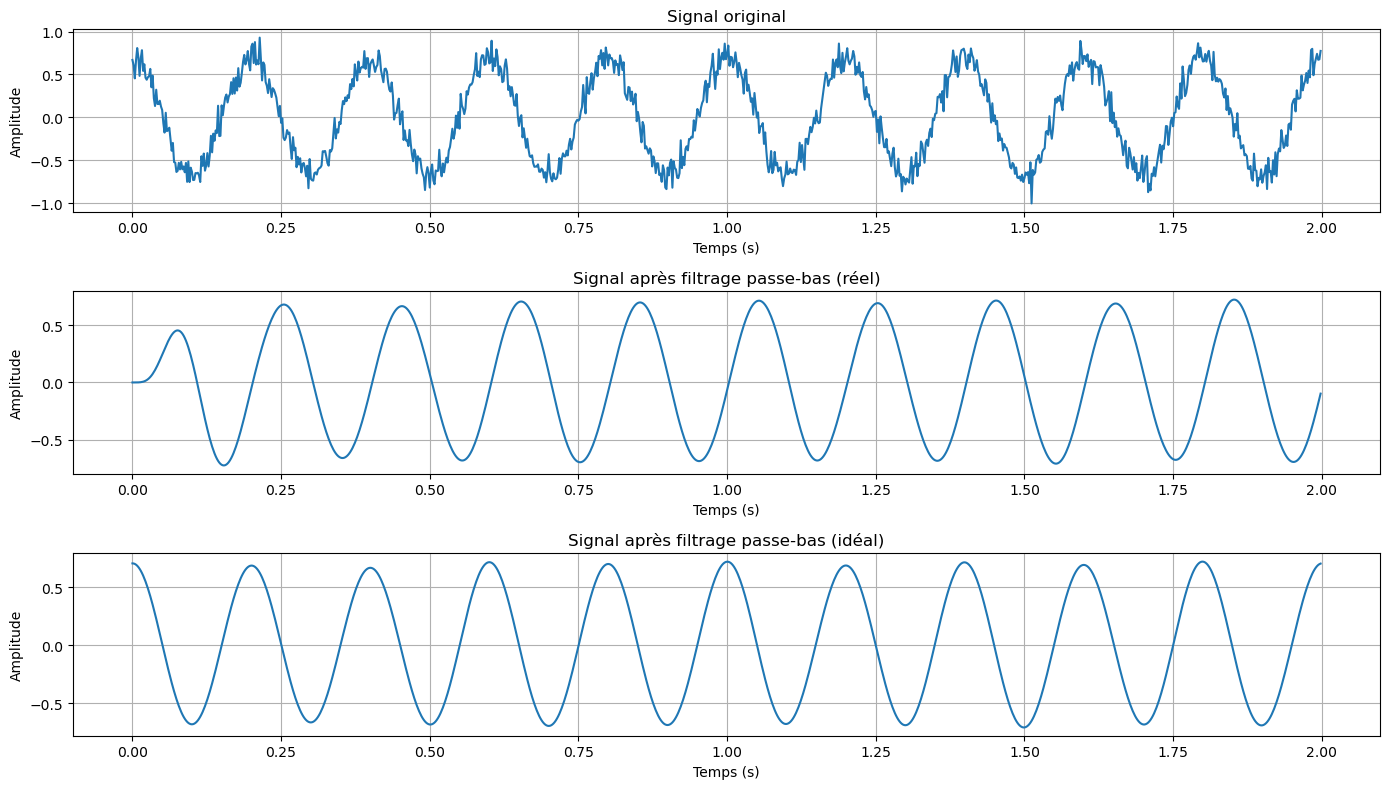

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Paramètres du signal
Fs = 500  # Fréquence d'échantillonnage (Hz)
T = 1.0 / Fs  # Période d'échantillonnage (s)
L = 1000  # Longueur du signal (nombre de points)
t = np.arange(0, L) * T  # Vecteur temps

# Générer un signal cosinus avec une fréquence basse et du bruit
freq_signal = 5  # Fréquence du signal (Hz)
signal = 0.7 * np.cos(2.0 * np.pi * freq_signal * t)  # Signal cosinus
signal += 0.1 * np.random.randn(L)  # Ajouter du bruit aléatoire au signal

# Fonction pour créer un filtre passe-bas de Butterworth
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs  # Fréquence de Nyquist
    normal_cutoff = cutoff / nyquist  # Fréquence de coupure normalisée
    b, a = butter(order, normal_cutoff, btype='low', analog=False)  # Coefficients du filtre
    return b, a

# Fonction pour appliquer le filtre passe-bas réel
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)  # Obtenir les coefficients du filtre
    y = lfilter(b, a, data)  # Appliquer le filtre au signal
    return y

# Appliquer le filtre passe-bas réel au signal
cutoff = 10  # Fréquence de coupure du filtre (Hz)
signal_filtered_real = butter_lowpass_filter(signal, cutoff, Fs)

# Fonction pour appliquer un filtre idéal (passe-bas avec coupure nette)
def ideal_lowpass_filter(data, cutoff_freq, fs):
    fft_values = np.fft.fft(data)  # Calcul de la FFT du signal
    fft_freqs = np.fft.fftfreq(len(data), 1/fs)  # Calcul des fréquences associées
    filter_mask = np.abs(fft_freqs) <= cutoff_freq  # Masque pour les fréquences de coupure
    filtered_fft_values = fft_values * filter_mask  # Appliquer le masque aux valeurs FFT
    filtered_signal = np.fft.ifft(filtered_fft_values)  # Calcul du signal filtré par FFT inverse
    return filtered_signal

# Appliquer le filtre passe-bas idéal au signal
signal_filtered_ideal = ideal_lowpass_filter(signal, cutoff, Fs)

# Affichage des résultats
plt.figure(figsize=(14, 8))

# Affichage du signal original
plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title('Signal original')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.grid()

# Affichage du signal filtré avec le filtre passe-bas réel
plt.subplot(3, 1, 2)
plt.plot(t, signal_filtered_real, label="Filtre réel (Butterworth)")
plt.title('Signal après filtrage passe-bas (réel)')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.grid()

# Affichage du signal filtré avec le filtre passe-bas idéal
plt.subplot(3, 1, 3)
plt.plot(t, np.real(signal_filtered_ideal), label="Filtre idéal (FFT)")
plt.title('Signal après filtrage passe-bas (idéal)')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()


# 4-filtre numerique FIR ( finit impluse filter )

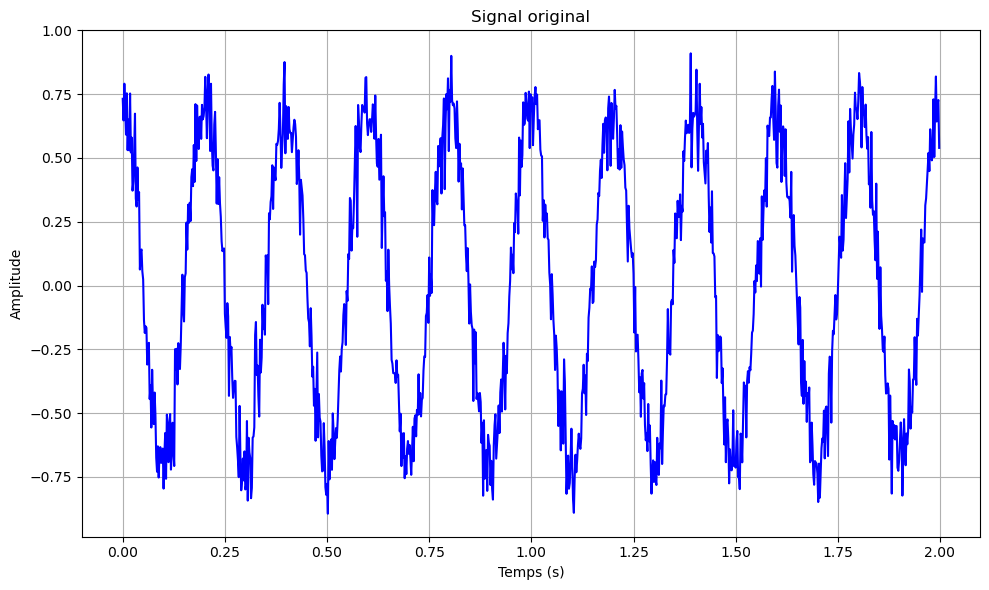

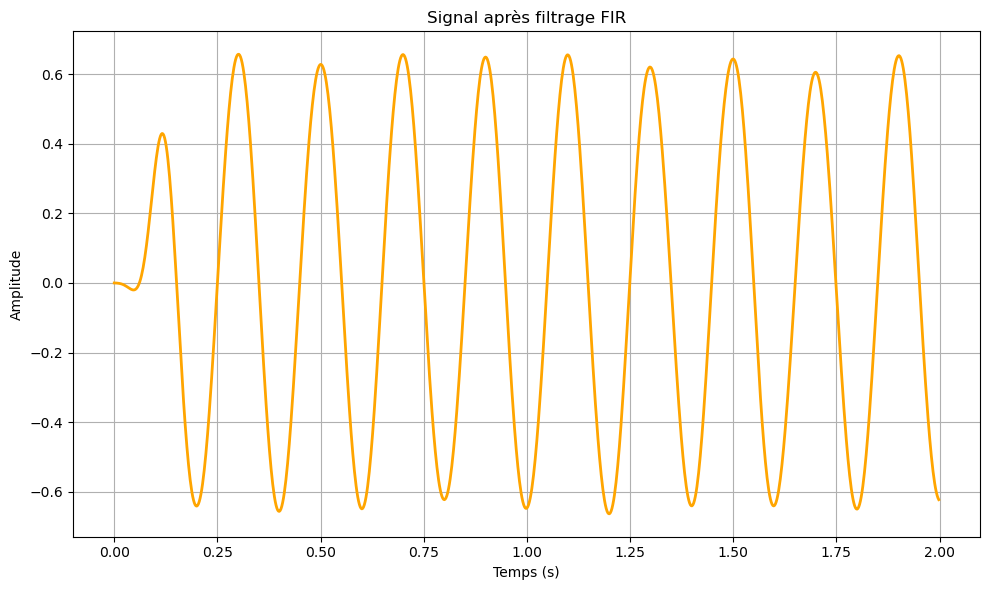

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Paramètres du signal
Fs = 500  # Fréquence d'échantillonnage (Hz)
T = 1.0 / Fs  # Période d'échantillonnage (s)
L = 1000  # Longueur du signal (nombre de points)
t = np.arange(0, L) * T  # Vecteur temps

# Générer un signal cosinus avec une fréquence basse et du bruit
freq_signal = 5  # Fréquence du signal (Hz)
signal = 0.7 * np.cos(2.0 * np.pi * freq_signal * t)  # Signal cosinus
signal += 0.1 * np.random.randn(L)  # Ajouter du bruit aléatoire au signal

# Fonction pour concevoir un filtre FIR passe-bas
def fir_lowpass(cutoff, fs, numtaps):
    nyquist = 0.5 * fs  # Fréquence de Nyquist
    normal_cutoff = cutoff / nyquist  # Fréquence de coupure normalisée
    fir_coeffs = firwin(numtaps, normal_cutoff, window='hamming')  # Coefficients du filtre FIR
    return fir_coeffs

# Fonction pour appliquer le filtre FIR
def fir_lowpass_filter(data, cutoff, fs, numtaps):
    fir_coeffs = fir_lowpass(cutoff, fs, numtaps)  # Conception du filtre FIR
    filtered_data = lfilter(fir_coeffs, 1.0, data)  # Appliquer le filtre au signal
    return filtered_data

# Paramètres du filtre FIR
cutoff = 10  # Fréquence de coupure du filtre (Hz)
numtaps = 101  # Nombre de coefficients (ordre du filtre + 1)

# Appliquer le filtre FIR passe-bas au signal
signal_filtered_fir = fir_lowpass_filter(signal, cutoff, Fs, numtaps)

# Affichage du signal original
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label="Signal original", color="blue")
plt.title('Signal original')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()
plt.show()

# Affichage du signal filtré avec le filtre FIR
plt.figure(figsize=(10, 6))
plt.plot(t, signal_filtered_fir, label="Signal filtré (FIR)", color="orange", linewidth=2)
plt.title('Signal après filtrage FIR')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()
plt.show()
